In [2]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(url)

In [4]:
data = data.sort_values(by=['Date'])
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 143.1+ KB


In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df = data.reset_index()['Close']
df.shape

(2035,)

In [8]:
df.head()

0    121.55
1    120.90
2    120.65
3    117.60
4    118.65
Name: Close, dtype: float64

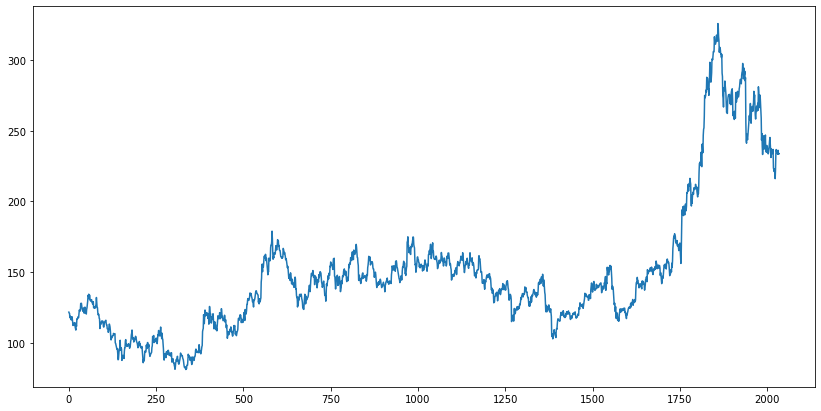

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(df)
plt.show()


In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df = sc.fit_transform(np.array(df).reshape(-1,1))
df.shape

(2035, 1)

In [11]:
df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [12]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train_size, test_size

(1628, 407)

In [13]:
train_data, test_data = df[0:train_size, :], df[train_size:len(df), :1]

In [14]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.24877451],
       [0.25245098],
       [0.24795752]])

In [15]:
def make_dataset(data, time_step):
	d1, d2 = [], []
	for i in range(len(data)-time_step-1):  
		d1.append(data[i:(i + time_step), 0])
		d2.append(data[i + time_step, 0])
	return np.array(d1), np.array(d2)

In [16]:
X_train, y_train = make_dataset(train_data, 100)
X_test, y_test = make_dataset(test_data, 100)

In [17]:
print(X_train.shape), print(y_train.shape)

(1527, 100)
(1527,)


(None, None)

In [18]:
print(X_test.shape), print(y_test.shape)

(306, 100)
(306,)


(None, None)

In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
24/24 [==============================] - 5s 213ms/step - loss: 0.0085 - val_loss: 0.0223
Epoch 2/100
24/24 [==============================] - 4s 176ms/step - loss: 0.0014 - val_loss: 0.0078
Epoch 3/100
24/24 [==============================] - 5s 204ms/step - loss: 8.1298e-04 - val_loss: 0.0044
Epoch 4/100
24/24 [==============================] - 4s 172ms/step - loss: 7.4405e-04 - val_loss: 0.0047
Epoch 5/100
24/24 [==============================] - 4s 181ms/step - loss: 7.1545e-04 - val_loss: 0.0051
Epoch 6/100
24/24 [==============================] - 7s 274ms/step - loss: 6.8434e-04 - val_loss: 0.0042
Epoch 7/100
24/24 [==============================] - 4s 184ms/step - loss: 6.5991e-04 - val_loss: 0.0054
Epoch 8/100
24/24 [==============================] - 4s 175ms/step - loss: 6.2387e-04 - val_loss: 0.0065
Epoch 9/100
24/24 [==============================] - 4s 167ms/step - loss: 5.8560e-04 - val_loss: 0.0080
Epoch 10/100
24/24 [==============================] - 4s 163ms/

24/24 [==============================] - 4s 159ms/step - loss: 1.3188e-04 - val_loss: 0.0015
Epoch 78/100
24/24 [==============================] - 4s 162ms/step - loss: 1.3463e-04 - val_loss: 9.3771e-04
Epoch 79/100
24/24 [==============================] - 4s 162ms/step - loss: 1.2987e-04 - val_loss: 0.0012
Epoch 80/100
24/24 [==============================] - 4s 160ms/step - loss: 1.3928e-04 - val_loss: 8.6515e-04
Epoch 81/100
24/24 [==============================] - 4s 164ms/step - loss: 1.2797e-04 - val_loss: 7.4423e-04
Epoch 82/100
24/24 [==============================] - 4s 165ms/step - loss: 1.2887e-04 - val_loss: 8.7405e-04
Epoch 83/100
24/24 [==============================] - 4s 162ms/step - loss: 1.3387e-04 - val_loss: 6.9885e-04
Epoch 84/100
24/24 [==============================] - 4s 160ms/step - loss: 1.3836e-04 - val_loss: 6.7591e-04
Epoch 85/100
24/24 [==============================] - 4s 163ms/step - loss: 1.5030e-04 - val_loss: 8.2067e-04
Epoch 86/100
24/24 [===========

In [24]:
train_pred = sc.inverse_transform(model.predict(X_train))
test_pred = sc.inverse_transform(model.predict(X_test))

In [25]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_pred)), math.sqrt(mean_squared_error(y_test, test_pred))

(134.17141680999316, 246.45638207746183)

In [26]:
look_back = 100
trainPredPlot = np.empty_like(df)
trainPredPlot[:, :] = np.nan
trainPredPlot[look_back:len(train_pred) + look_back, :] = train_pred

In [27]:
testPredPlot = np.empty_like(df)
testPredPlot[:, :] = np.nan
testPredPlot[len(train_pred) + (look_back*2) + 1:len(df) - 1, :] = test_pred

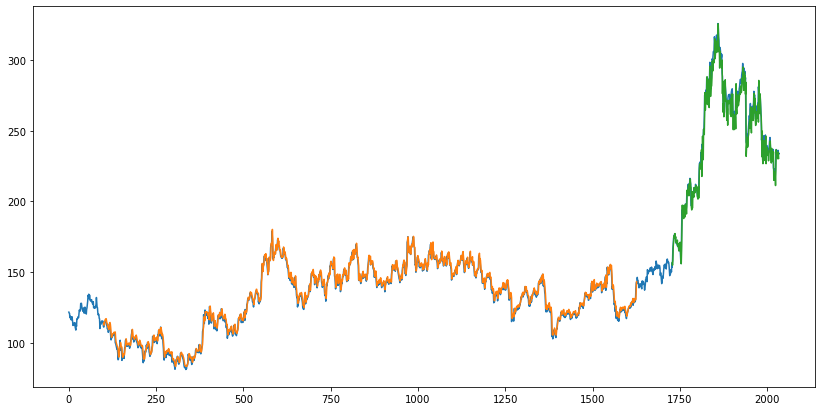

In [28]:
plt.figure(figsize=(14, 7))
plt.plot(sc.inverse_transform(df))
plt.plot(trainPredPlot)
plt.plot(testPredPlot)
plt.show()

In [29]:
len(test_data)

407

In [30]:
X_input = test_data[307:].reshape(1,-1)
X_input.shape

(1, 100)

In [31]:
temp = list(X_input)
temp = temp[0].tolist()

In [32]:
temp

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [33]:
list_output = []
num_steps=100
i = 0
while (i < 30):
    if(len(temp) > 100):
        X_input = np.array(temp[1:])
        print("Day {} input {}".format(i, X_input))
        X_input = X_input.reshape(1,-1)
        X_input = X_input.reshape((1, num_steps, 1))
        yhat = model.predict(X_input, verbose = 0)
        print("Day {} output {}".format(i, yhat))
        temp.extend(yhat[0].tolist())
        temp = temp[1:]
        list_output.extend(yhat.tolist())
        i = i + 1
    else:
        X_input = X_input.reshape((1, num_steps, 1))
        yhat = model.predict(X_input, verbose = 0)
        print(yhat[0])
        temp.extend(yhat[0].tolist())
        print(len(temp))
        list_output.extend(yhat.tolist())
        i = i + 1

print(list_output)

[0.6154162]
101
Day 1 input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

Day 12 output [[0.4664907]]
Day 13 input [0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 0.55167484 0.57883987 0.625
 0.63582516 0.62949346 0.62888072 0.62765523 0.62234477 0.63378268
 0.62622549 0.62214052 0.6

Day 21 output [[0.43571588]]
Day 22 input [0.76041667 0.75980392 0.74652778 0.76245915 0.77062908 0.80412582
 0.78104575 0.79411765 0.76021242 0.73488562 0.72406046 0.73999183
 0.74979575 0.76143791 0.75428922 0.74754902 0.76960784 0.7495915
 0.81719771 0.80208333 0.77736928 0.75714869 0.79370915 0.79166667
 0.77144608 0.75265523 0.72691993 0.6629902  0.68198529 0.64419935
 0.62152778 0.6439951  0.66319444 0.67544935 0.63705065 0.64603758
 0.65890523 0.65870098 0.67790033 0.63194444 0.63112745 0.62785948
 0.64767157 0.63991013 0.63480392 0.63868464 0.62336601 0.62745098
 0.63970588 0.64705882 0.66196895 0.67075163 0.65196078 0.63112745
 0.61294935 0.6376634  0.62254902 0.62745098 0.63337418 0.62642974
 0.63623366 0.58312908 0.57781863 0.57230392 0.58006536 0.57618464
 0.55167484 0.57883987 0.625      0.63582516 0.62949346 0.62888072
 0.62765523 0.62234477 0.63378268 0.62622549 0.62214052 0.62418301
 0.61541623 0.59921491 0.58079201 0.56433076 0.54924339 0.53512675
 0.52195549 0.5098349

In [34]:
new_day = np.arange(1, 101)
pred_day = np.arange(101, 131)

In [35]:
len(df)

2035

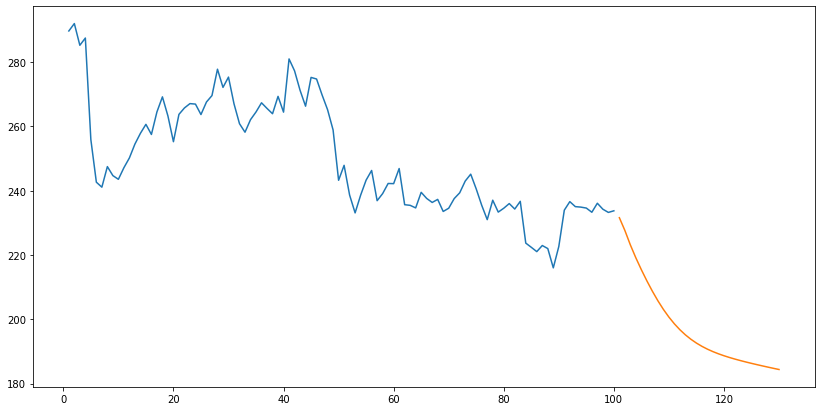

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(new_day, sc.inverse_transform(df[1935:]))
plt.plot(pred_day, sc.inverse_transform(list_output))
plt.show()

In [37]:
df = df.tolist()
df.extend(list_output)

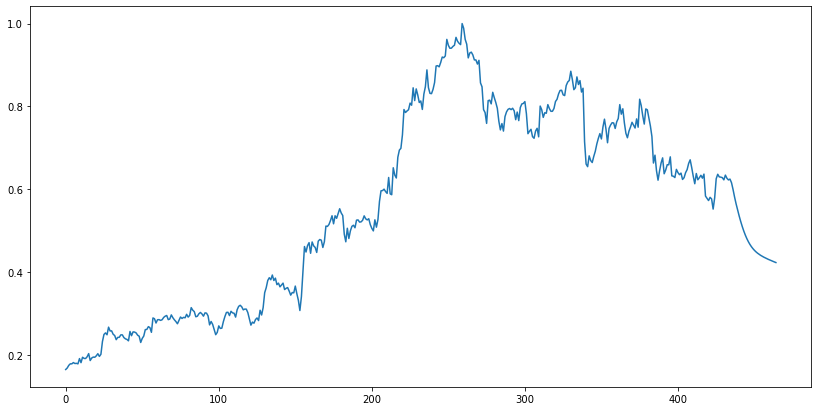

In [38]:
plt.figure(figsize=(14, 7))
plt.plot(df[1600:])
plt.show()